# <center>Heart Stroke Prediction</center>

Life cycle of a Machine Learning Project
    <ul>
 <li>Understanding the problem statement</li>
 <li>Data Collection</li>
 <li>Data Cleaning</li>
 <li>Exploratory data analysis</li>
 <li>Data preprocessing</li>
 <li>Model Training</li>
 <li>Choose best model</li>
 </ul>

### 1) Problem statement 

In the proposed model, heart stroke prediction is performed on a dataset collected from Kaggle. The model predicts the chances of a person will have stroke based on symptoms like age, gender, average glucose level, smoking status, body mass index, work type and residence type.

### 2) Import Data

##### **Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings

C:\Users\Dhananjana\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
warnings.filterwarnings("ignore")
%matplotlib inline

##### **Import the CSV data as Pandas dataframe**

In [4]:
df = pd.read_csv("Data/stroke_dataset.csv")

**Show top 5 records**

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

**Shape of the dataset**

In [7]:
df.shape

(5110, 12)

**Summary of the dataset**

In [8]:
# Display summary statistics for a dataframe
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### **Statistical Inferences**

<ul>
<li>Mean age of the population is 43 years.</li>
<li>25% of the population is aged below 25</li>
<li>Another 25% is aged 60 and remaining in between these ages.</li>
<li>Average glucose levels of the population is 106</li>
<li>About 9.7% and 5.4% of population suffers from hypertension and heart disease respectively</li>
<li>People with higher BMI (BMI>45) are less represented. This can affect our machine learning model significantly</li>
</ul>

**Check datatypes in the dataset**

In [9]:
# check null values and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### 3) Exploring Data

In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))
print("\nWe have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 7 numerical features: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

We have 5 categorical features: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


### Feature Information
<ul>
<li> Here we used the heart stroke dataset that is available in the kaggle website for our analysis. This dataset consists of total 12 attributes. The complete description of the attributes used in the proposed work is given below:</li>
<li> id : This attribute means person’s id. It’s numerical data.</li>
<li> Age : This attribute means a person’s age. It’s numerical data.</li>
<li> Gender : This attribute means a person’s gender. It’s categorical data.</li>
<li> Hypertension : This attribute means that this person is hypertensive or not. It’s numerical data.</li>
<li> work type : This attribute represents the person work scenario. It’s categorical data.</li>
<li> residence type : This attribute represents the person living scenario. It’s categorical data.</li>
<li> heart disease : This attribute means whether this person has a heart disease person or not. It’s numerical data.</li>
<li> avg glucose level : This attribute means what was the level of a person’s glucose condition. It’s numerical data.</li>
<li> Bmi : This attribute means body mass index of a person. It’s numerical data.</li>
<li> ever married : This attribute represents a person’s married status. It’s categorical data.</li>
<li> smoking Status : This attribute means a person’s smoking condition. It’s categorical data.</li>
<li> Stroke : This attribute means a person previously had a stroke or not.</li>
</ul>

In [11]:
# propotion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print("----------------------------------")

gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64
----------------------------------
ever_married
Yes    65.616438
No     34.383562
Name: proportion, dtype: float64
----------------------------------
work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64
----------------------------------
Residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64
----------------------------------
smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64
----------------------------------


### Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix "uni" means "one". The purpose of univariate analysis is to understand the distribution of values for a single variable.

#### Numerical Features

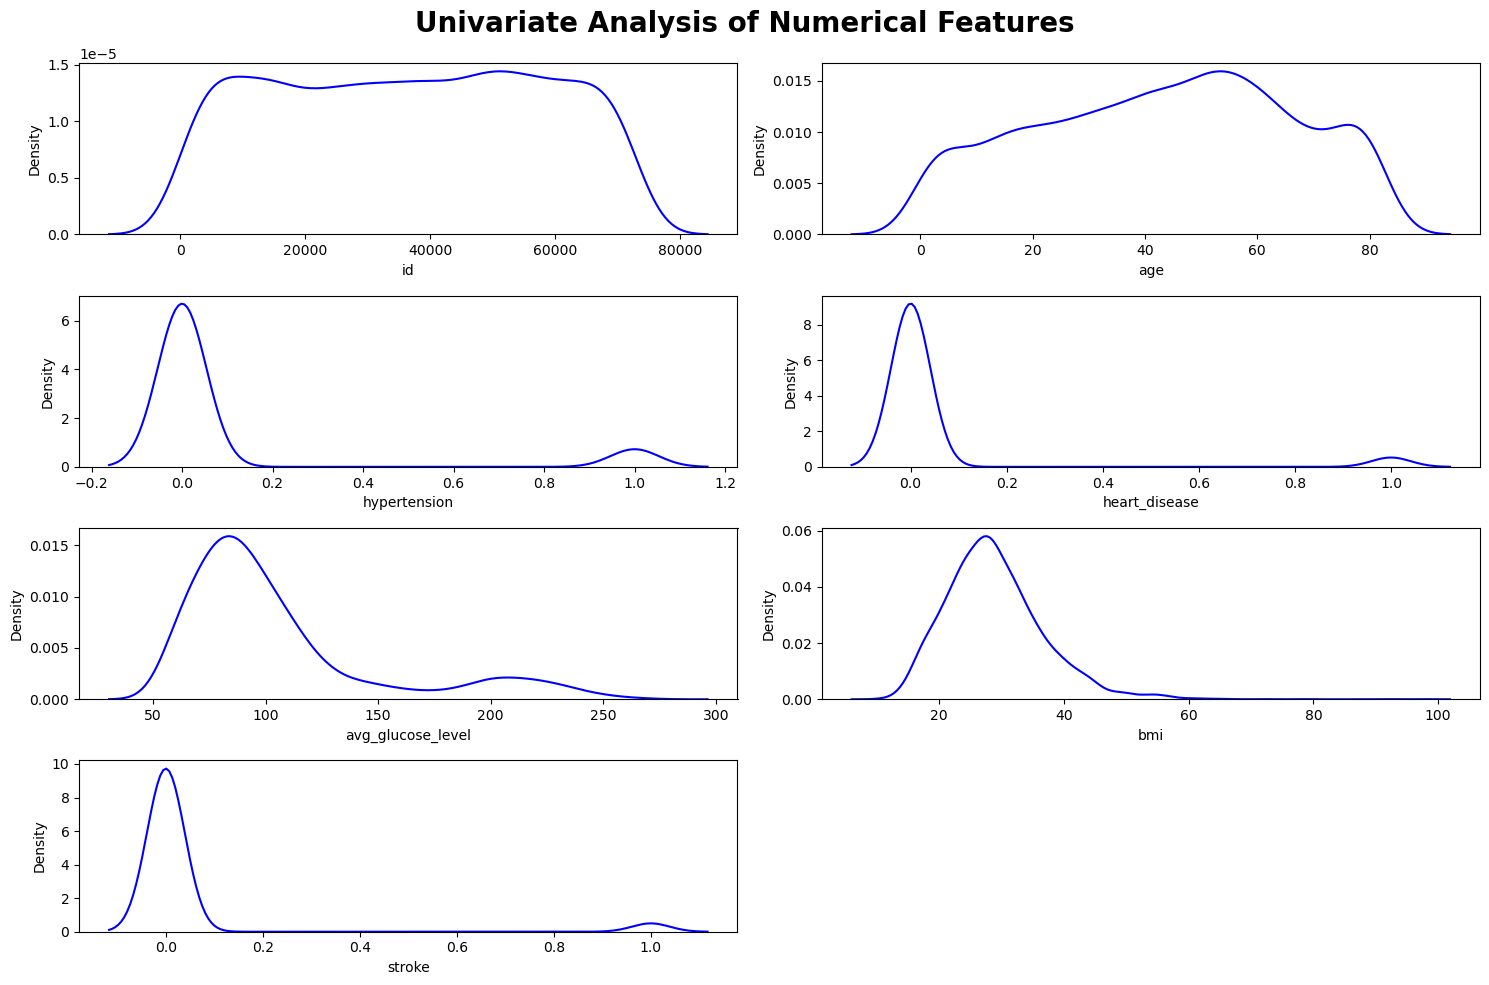

In [12]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold')

for i in range(0, len(numeric_features)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


**Report**

<ul>
<li>age, bmi, avg_glucose_level are the only continous features</li>
<li>id is a primary key which is of no importance</li>
<li>hypertension, heart_disease, stroke are categorical features but they are encoded</li>

  </ul>

#### Categorical Features

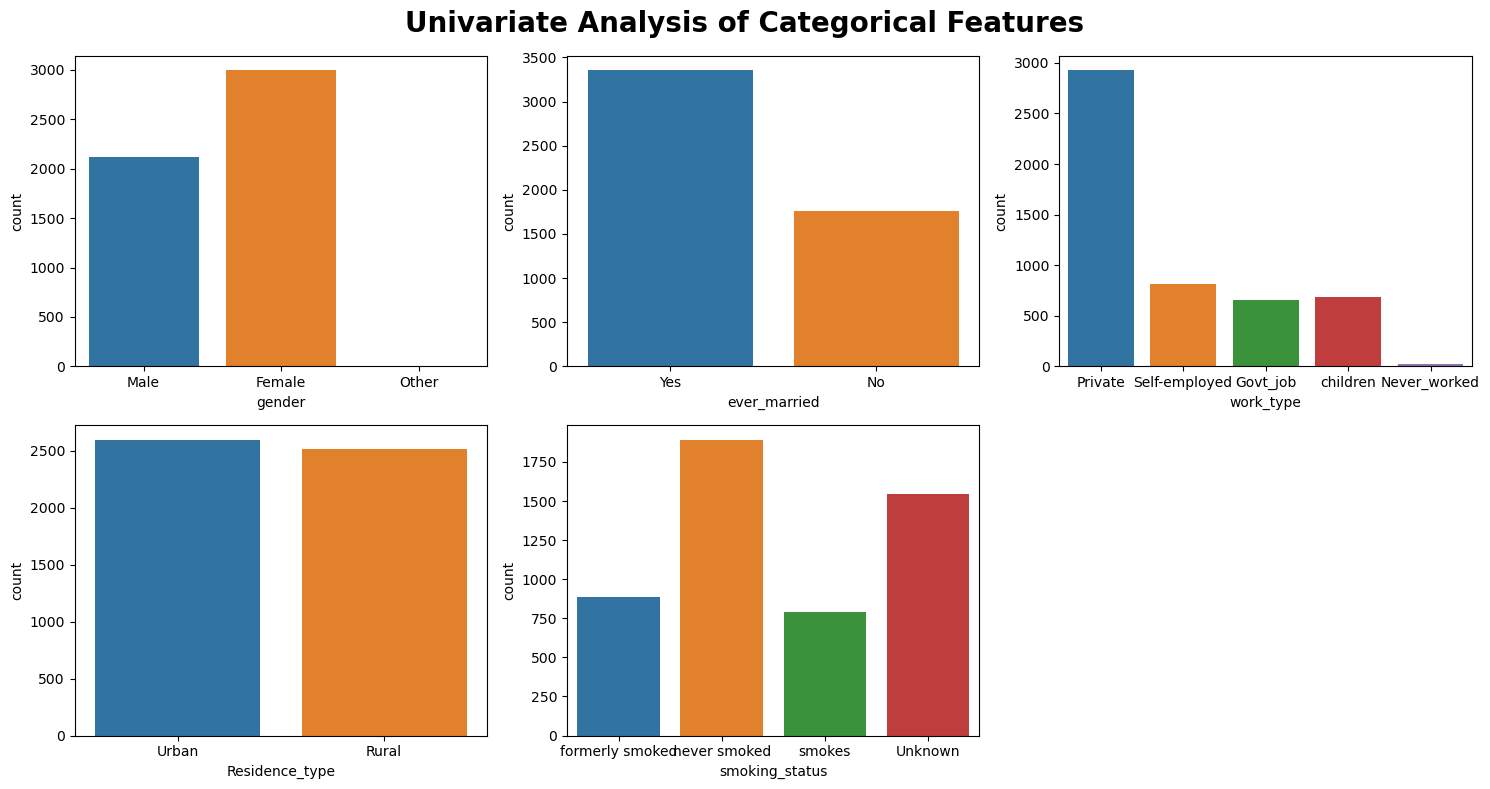

In [13]:
# categorical columns
plt.figure(figsize=(15,8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold')

for i in range(0, len(categorical_features)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()



**Report**
<ul>
<li>Gender has Others category which is around 2%  of total genders</li>
<li>Smoking has unknown category for who the smoking status is not available</li>
</ul>

### Multivariate Analysis

<ul>
<li>Multivariate analysis is the analysis of more than two variables</li>
</ul>

In [14]:

discrete_features=[feature for feature in numeric_features if (len(df[feature].unique())<=25 and len(df[feature].unique())>5)]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

encoded_categorical = [feature for feature in numeric_features if len(df[feature].unique()) <=5]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))
print('\nWe have {} encoded_categorical : {}'.format(len(encoded_categorical), encoded_categorical))

We have 0 discrete features : []

We have 4 continuous_features : ['id', 'age', 'avg_glucose_level', 'bmi']

We have 3 encoded_categorical : ['hypertension', 'heart_disease', 'stroke']


<ul>
<li>There are no discrete numerical features</li>
</ul>

In [15]:
categorical_features = categorical_features + encoded_categorical
print(categorical_features)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']


### Check Multicollinearity in Numerical features

In [16]:
df[(list(df[continuous_features])[1:])].corr()

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.333398
avg_glucose_level,0.238171,1.000000,0.175502
bmi,0.333398,0.175502,1.000000


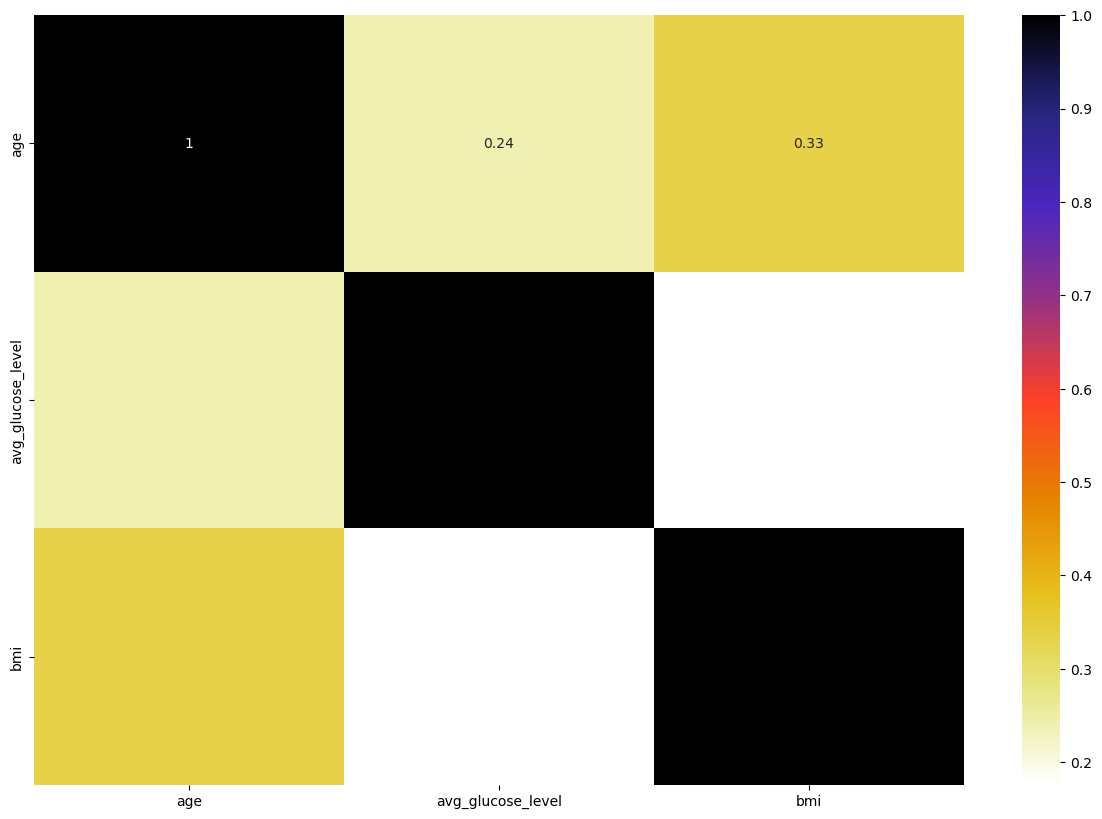

In [17]:
plt.figure(figsize = (15,10))
cont_features = continuous_features.copy()
cont_features.remove('id')
sns.heatmap(df[cont_features].corr(), cmap="CMRmap_r", annot=True)
plt.show()

**Insight**
<ul>
<li>There are no multicollinearity present in the dataset since there is no correalation between the features</li>
</ul>

#### Check Multicollinearity for categorical features

<ul>
<li> A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-square test </li>
<li>A  chi-square statistic is one way to show a relationship between two categorical variabels</li>
<li>Here we test correlation of categorical columns with target column i.e stroke</li>
</ul>

Null Hypothesis (H0): The feature is independent of target column (No-correlation)
Alternate Hypothesis (H1): The feature and target column are not independent (Correlated)

In [18]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['stroke'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column','Hypothesis Result']
result

,Column,Hypothesis Result
0,gender,Fail to reject Null Hypothesis
1,ever_married,Reject Null Hypothesis
2,work_type,Reject Null Hypothesis
3,Residence_type,Fail to reject Null Hypothesis
4,smoking_status,Reject Null Hypothesis
5,hypertension,Reject Null Hypothesis
6,heart_disease,Reject Null Hypothesis
7,stroke,Reject Null Hypothesis


Let's  dealt with the gender column which has a category other with only one observation and check the hypothesis again

In [19]:
df1 = df.copy()
df1.gender = np.where(df.gender == 'Other', 'Female', df.gender)

In [20]:
chi2_contingency(pd.crosstab(df1['stroke'], df1['gender']))

Chi2ContingencyResult(statistic=0.34312923759376157, pvalue=0.5580285118426893, dof=1, expected_freq=array([[2849.05968689, 2011.94031311],
       [ 145.94031311,  103.05968689]]))

Even after the substittution the difference in not significant and we fail to reject the null hypothesis

**Report**

<ul>
<li>Gender and Residence_type are independent of the target column (Not correlated with the target)</li>
</ul>

#### Checking null values

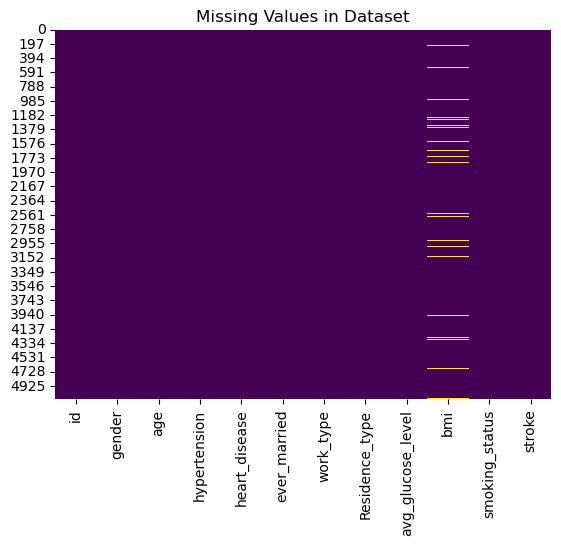

In [21]:
df.isnull().sum()

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()


**We have a single column bmi with about 200 missing values which we have to deal with**

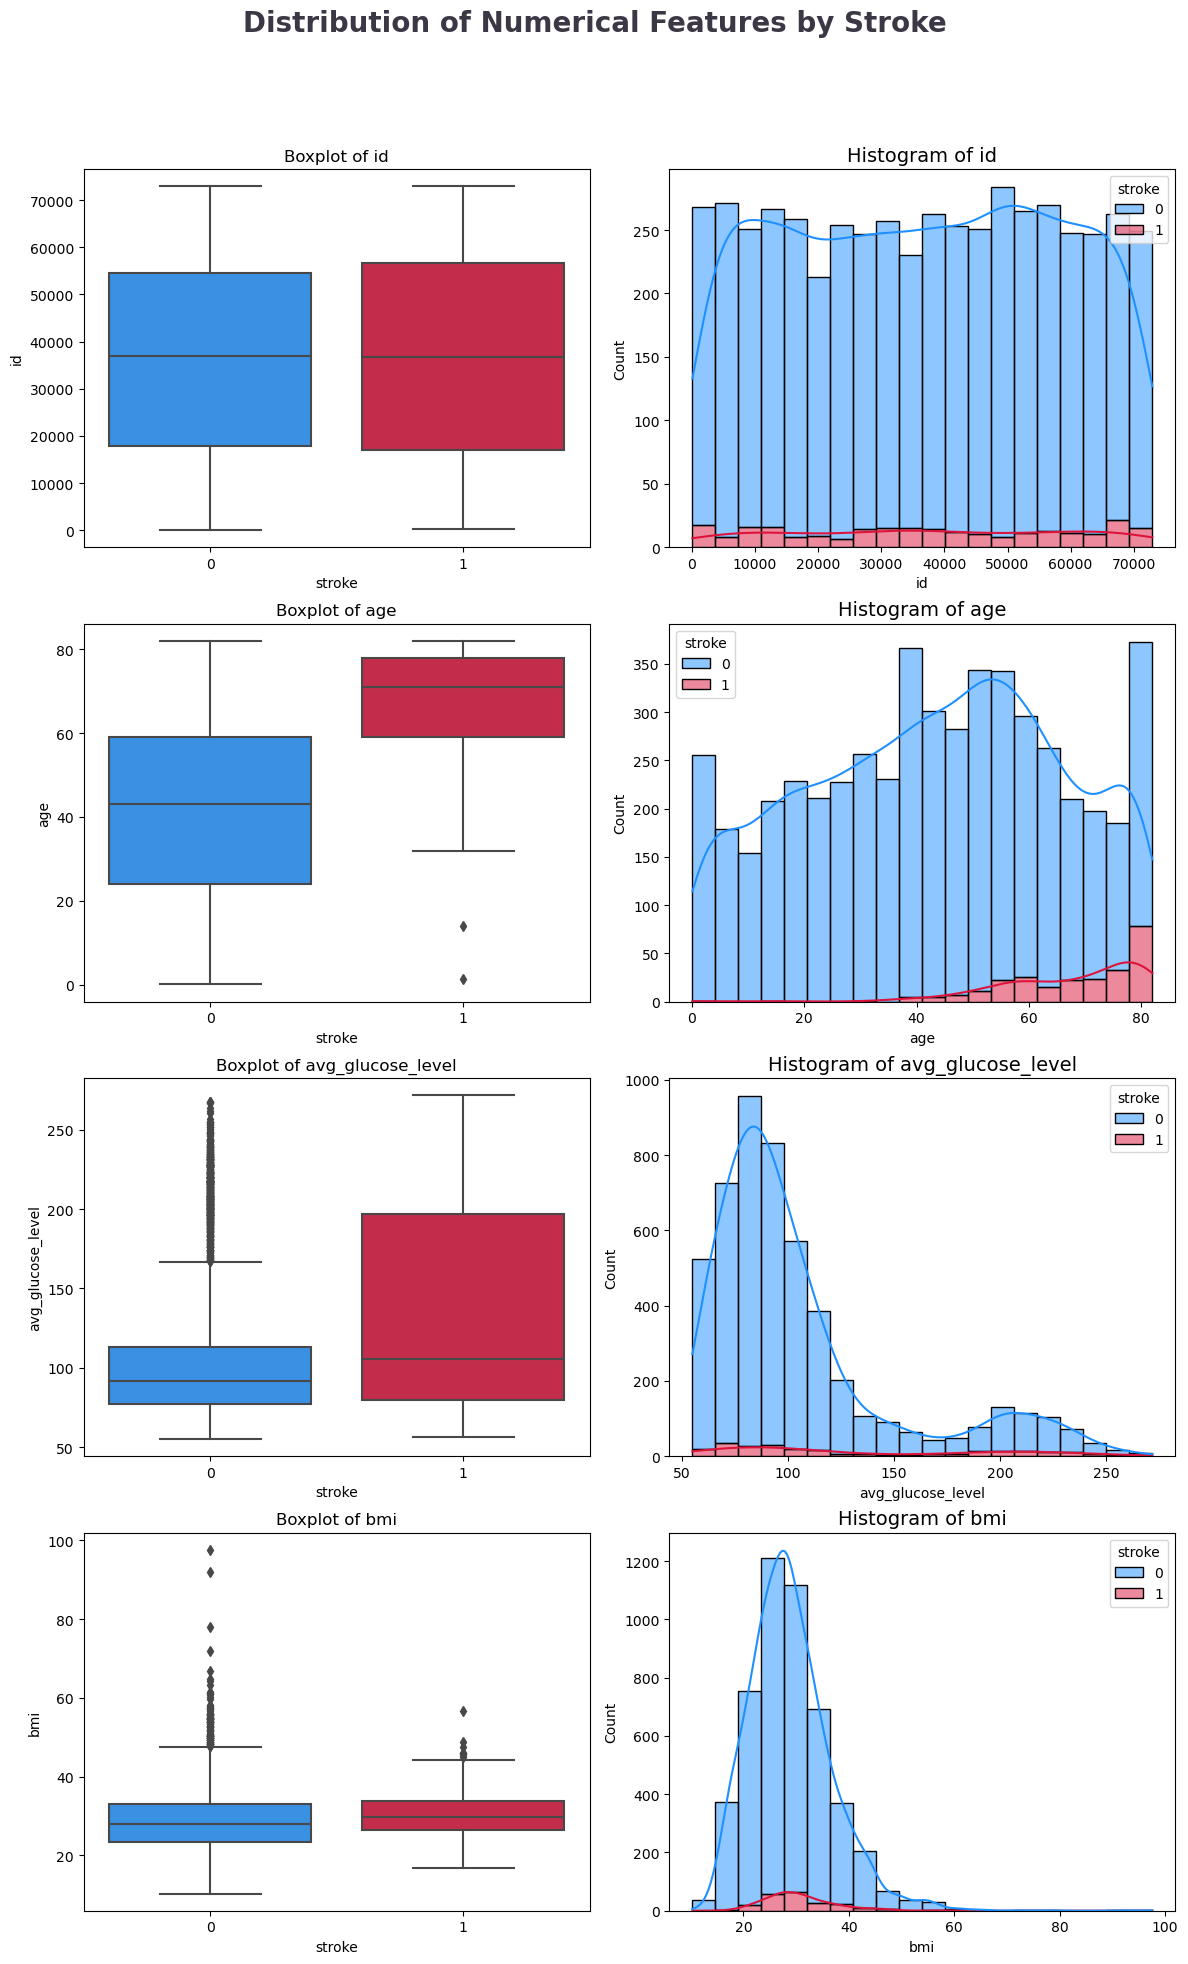

In [22]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(4,2, figsize=(12,20))
fig.suptitle('Distribution of Numerical Features by Stroke', color='#3C3744', fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(continuous_features):
    sns.boxplot(data=df, x='stroke', y=col, palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='stroke', bins=20, kde=True, multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)

fig.tight_layout()
fig.subplots_adjust(top=0.90)

**Report**

<ul>
<li>In the id column has unique value for each row, it can be ignored as a feature</li>
<li>Higher age group people have higher chance of heart stroke</li>
<li>Higher the avg_glucose_level higher willbe the chance of stroke</li>
<li>bmi have not much of a influence on the heart stroke may be because of missing values</li>
  
  </ul>

#### **Initial Analysis Report**

<ul>
<li>There are missing values in the bmi</li>   
<li>The id column can be deleted because each row has unique values</li>
<li>Residet_type and Gender columns are not correlated with stroke (Target Column)</li>
<li>The stroke column is the target to predict</li>

</ul>

### 4) Visualization

#### 4.1 Visualize the target Feature

In [23]:
df1 = df.copy()
df1['stroke'] = np.where((df.stroke == 1), 'stroke', 'Not-Stroke')

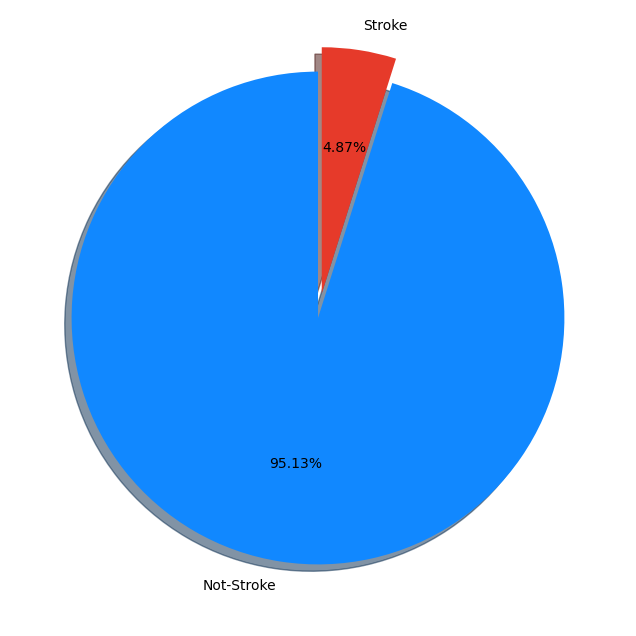

In [24]:
percentage = df1.stroke.value_counts(normalize=True)*100
label = ["Not-Stroke", "Stroke"]

# Plot piechart with Plotty library
fig, ax = plt.subplots(figsize=(15,8))
explode = (0, 0.1)
colors = ['#1188ff', '#e63a2a']
ax.pie(percentage, labels = label, startangle=90, autopct='%1.2f%%', explode=explode, shadow=True, colors=colors)
plt.show()


<ul>
<li>From the chart it is clear that the Target Variable is Imbalanced</li>
</ul>

**What is imbalanced data?**

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here number of Not-Stroke has more count than the number of stroke of the dataset.

**4.2 Do men or women have more chance of stroke?**

In [25]:
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [26]:
df1[df1.stroke == 'stroke'].gender.value_counts(normalize=True)*100

gender
Female    56.626506
Male      43.373494
Name: proportion, dtype: float64

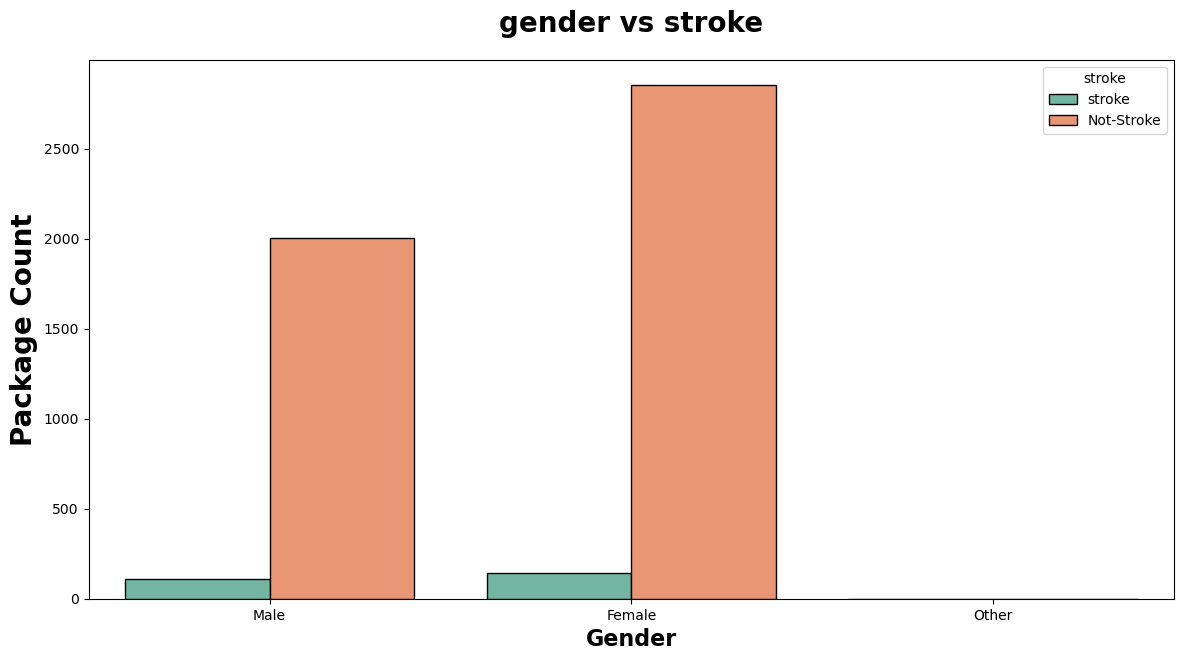

In [27]:
plt.subplots(figsize=(14,7))
sns.countplot(x='gender', hue='stroke', data=df1, ec='black', palette='Set2')
plt.title('gender vs stroke', weight='bold', fontsize=20, pad=20)
plt.ylabel('Package Count', weight='bold', fontsize=20)
plt.xlabel('Gender', weight='bold', fontsize=16)
plt.show()

**Insights**
<ul>
<li>As per the chart there is no much difference between the stroke of male and female</li>
<li>This feature has no impact on the target variable</li>
<li>Our insights from Chi2 test is that gender column is not correlated with target column. Which is justified by above chart</li>
  
  </ul>

#### 4.3 Age category split

In [28]:
bins = [0,10,20,50,85]
labels = ['Children', 'Teens', 'Adult', 'Senior']
df2 = df.copy()
df2['age_cat'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_group = df2.groupby(['age_cat', 'stroke'])['id'].count().reset_index(name='count')
age_group

,age_cat,stroke,count
0,Children,0,471
1,Children,1,1
2,Teens,0,493
3,Teens,1,1
4,Adult,0,1916
5,Adult,1,18
6,Senior,0,1981
7,Senior,1,229


In [29]:
df2['age_cat'] = df2['age_cat'].astype(str)
df2['stroke'] = df2['stroke'].astype(str)

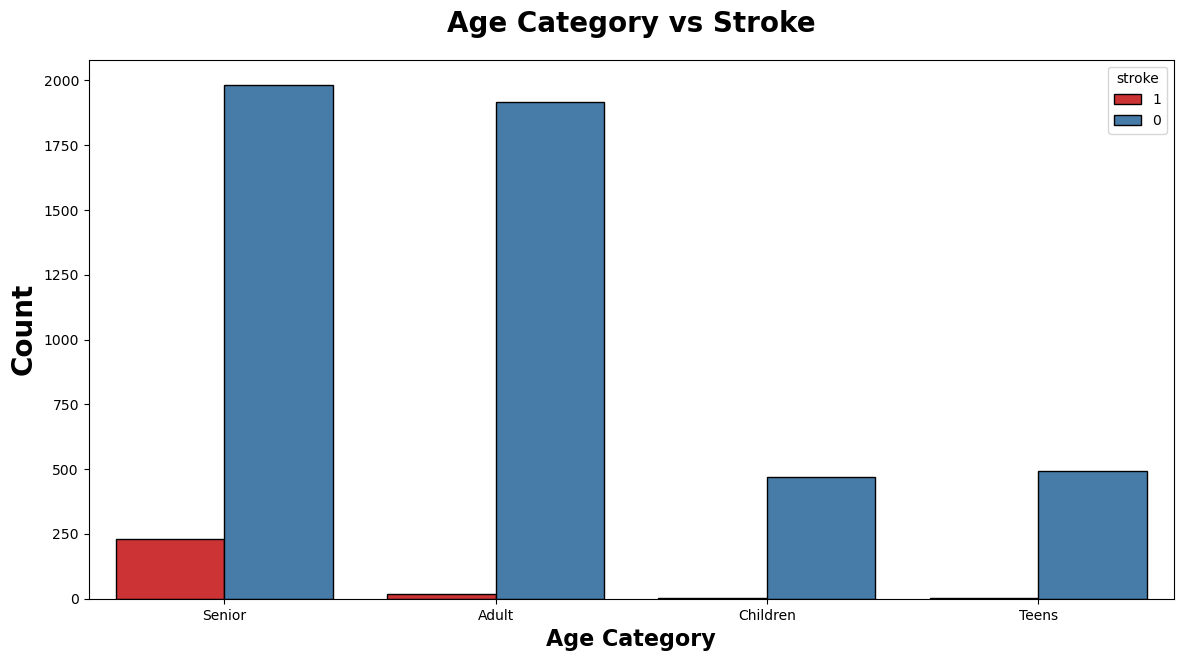

In [30]:
plt.subplots(figsize=(14,7))
sns.countplot(x="age_cat", hue="stroke", data=df2, ec="black", palette="Set1")
plt.title("Age Category vs Stroke", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Age Category", weight="bold", fontsize=16)
plt.show()

**Insights**

<ul>
<li>As per the chart senior age group has the more chance of heart stroke followed by adults</li>
<li>Children and teens have least chance of the stroke because of high physical activity</li>
</ul>

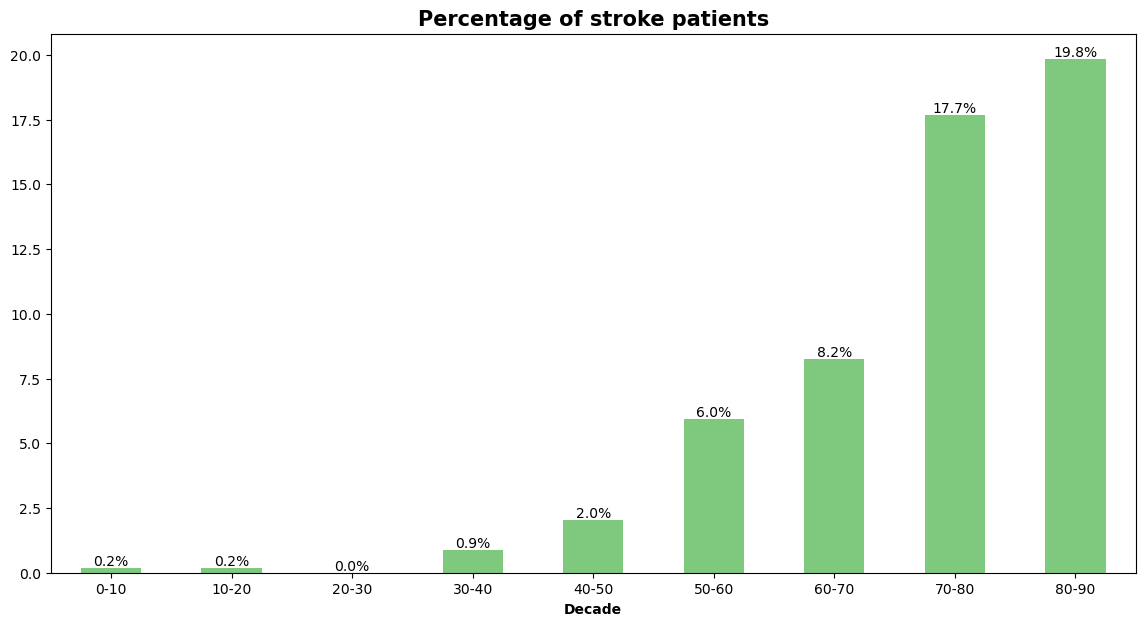

In [31]:
df2 = df.copy()
bins = [0,10,20,30,40,50,60,70,80,90]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']
df2['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

import matplotlib.ticker as mtick

plt.figure(figsize=[14,7])

(100*df2[df2["stroke"].isin([1])]["age_group"].value_counts()/df2["age_group"].value_counts()).plot(kind="bar", stacked=True, colormap="Accent")
plt.title("Percentage of stroke patients", fontsize=15, fontweight='bold')
order1 = (100*df2[df2["stroke"].isin([1])]["age_group"].value_counts()/df2["age_group"].value_counts())

for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n, count+0.1, strt, ha='center')

plt.xlabel('Decade', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
<ul>
<li>As the age increases there is a higher chance of heart stroke</li>
  </ul>

#### 4.4 Does HyperTension makes any difference

In [32]:
df2['hypertension'] = df2['hypertension'].astype(str)
df2['stroke'] = df2['stroke'].astype(str)

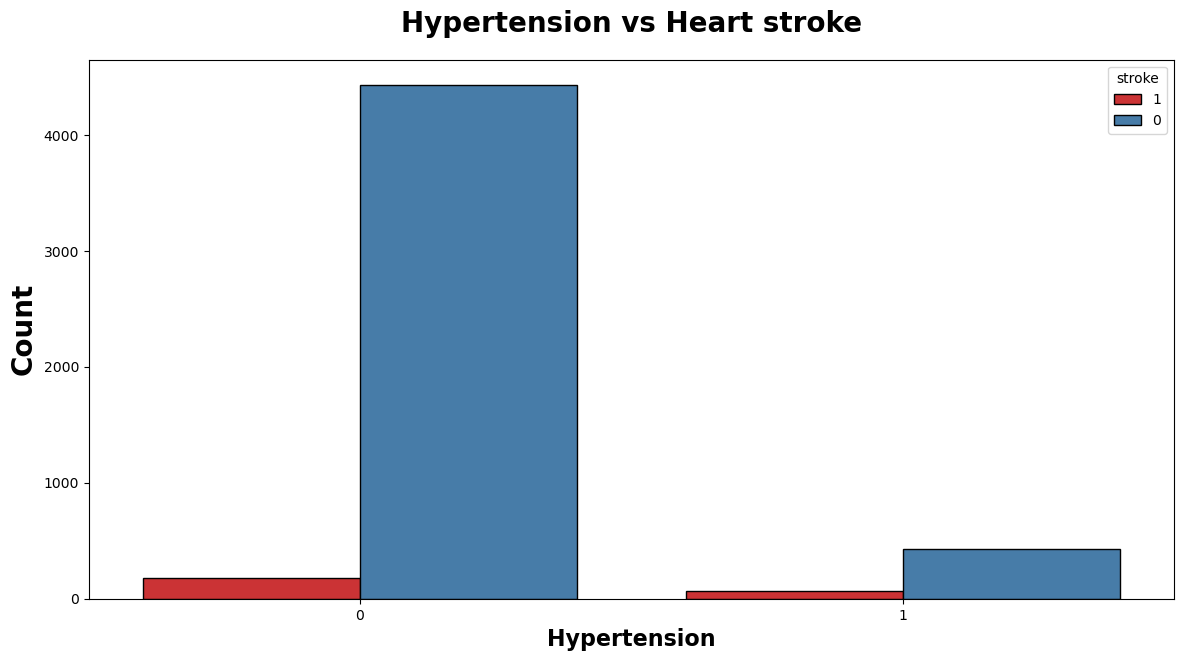

In [33]:
plt.subplots(figsize=(14,7))
sns.countplot(x='hypertension', data=df2, ec='black', palette='Set1', hue='stroke')
plt.title("Hypertension vs Heart stroke", weight='bold', fontsize=20, pad=20)
plt.ylabel("Count", weight='bold', fontsize=20)
plt.xlabel("Hypertension", weight='bold', fontsize=16)
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


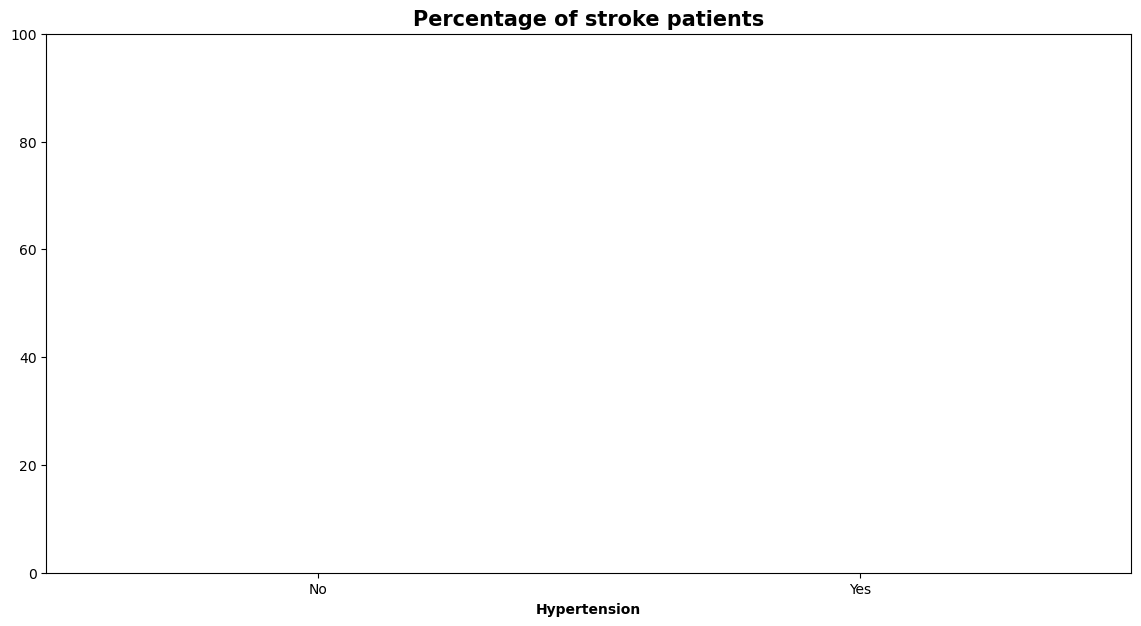

In [34]:
plt.subplots(figsize=(14,7))

(100*df2[df2["stroke"].isin([1])]['hypertension'].value_counts()/df2['hypertension'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['hypertension'].value_counts()/df2['hypertension'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n, count*1.01, strt, ha='center')
    
plt.xlabel('Hypertension' , fontweight ='bold')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'] ,rotation=0)
plt.ylim(0, 100)
plt.show()

**Insights**

<ul>
<li>Even though the patients with no hypertension and having chance of stroke are high but remember the data is imbalanced</li>
<li>In comparison with the number of people in both categories patients with hypertension have more chance of stroke</li>
</ul>

#### 4.5 Impact of BMI

BMI parameter can be divided into four categories [Under_weight/ Normal_weight/ Over_weight/ Obese]

The category of BMI:
    <ul>
    <li>Under_weight ( BMI < 18.5 )</li>
    <li>Normal_weight ( 18.5 < BMI < 25 )</li>
    <li>Over_weight ( 25 < BMI < 30 )</li>
    <li>Obese ( BMI > 30 )</li>
    </ul>

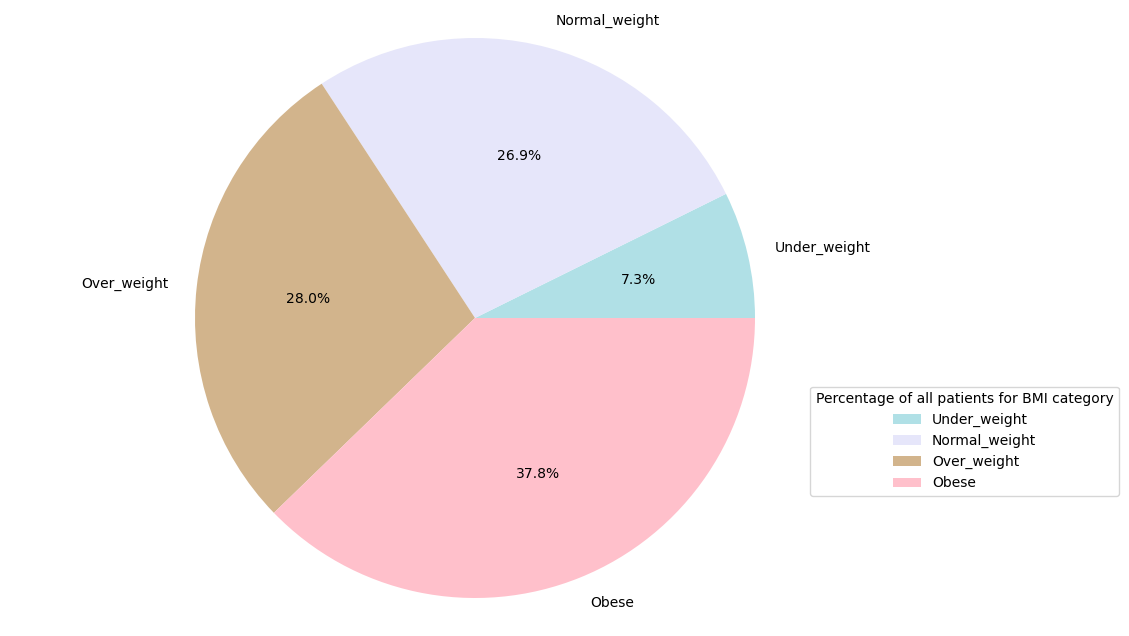

In [35]:
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(x=[df[df['bmi'] <= 18.5]['stroke'].value_counts()[0],
          df[(df['bmi'] <= 25) & (df['bmi'] > 18)]['stroke'].value_counts()[0],
            df[(df['bmi'] <= 30) & (df['bmi'] > 25)]['stroke'].value_counts()[0], 
            df[df['bmi'] > 30]['stroke'].value_counts()[0]],
            labels=['Under_weight','Normal_weight','Over_weight','Obese'],
            pctdistance=0.6, radius=6, autopct='%1.1f%%',
            colors=['powderblue','lavender','tan','pink'])
ax1.axis('equal')
plt.legend(title = "Percentage of all patients for BMI category", loc=1, bbox_to_anchor=(1.2, 0.4))
plt.show()

**Insights**

<ul>
<li>We have most number of Obese patients followed by the Over_weight totally comprises of nearly 65% of the total patients</li>
<li>We have less number of patients with underweight</li>
</ul>

In [36]:
df2=df.copy()
bins=[0,18,25,30,100]
labels=['0-18','18-25','25-30','30-100']
df2['bmi_cat']=pd.cut(df['bmi'], bins=bins, labels=labels)
bmi_group=df2.groupby(['bmi_cat','stroke'])['id'].count().reset_index(name='count')
bmi_group

,bmi_cat,stroke,count
0,0-18,0,288
1,0-18,1,1
2,18-25,0,1281
3,18-25,1,37
4,25-30,0,1334
5,25-30,1,75
6,30-100,0,1797
7,30-100,1,96


In [37]:
df2['bmi_cat'] = df2['bmi_cat'].astype(str)
df2['stroke'] = df2['stroke'].astype(str)

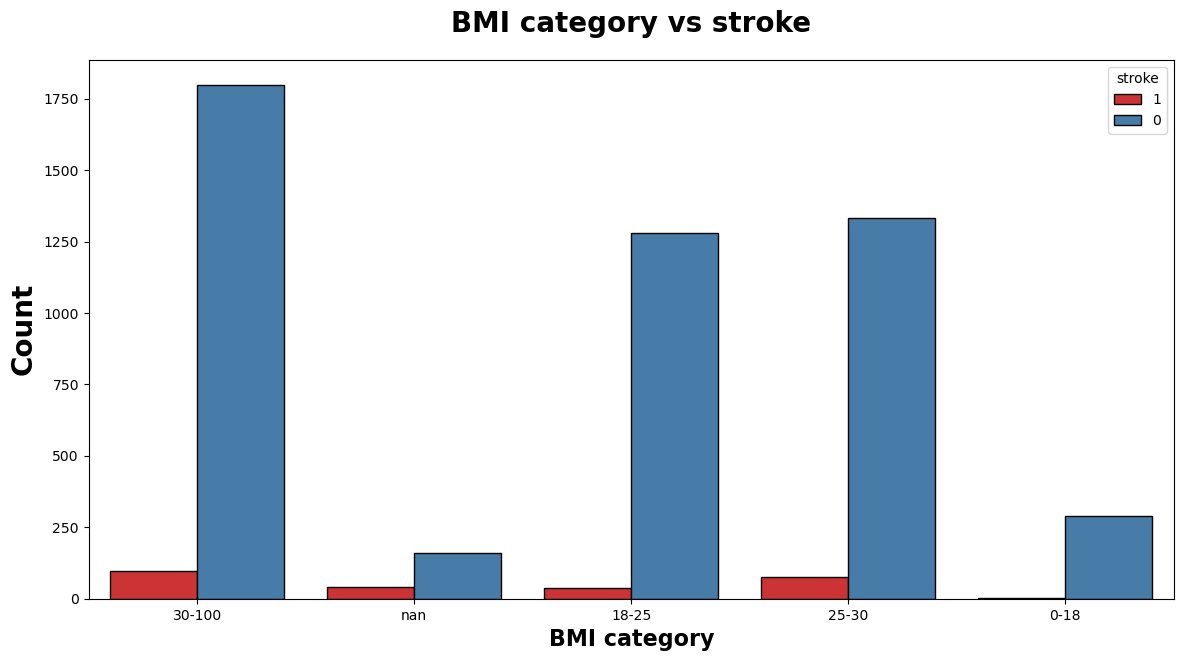

In [38]:
plt.subplots(figsize=(14,7))
sns.countplot(x='bmi_cat', hue='stroke', data=df2, ec='black', palette='Set1')
plt.title('BMI category vs stroke', weight='bold', fontsize=20, pad=20)
plt.ylabel("Count", weight='bold', fontsize=20)
plt.xlabel("BMI category", weight='bold', fontsize=16)
plt.show()

**Insights**
<ul>
<li>We can see as the BMI increases there is a high chance of stroke. Implies that the obese and overweight people have high chance of stroke</li>
  </ul>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


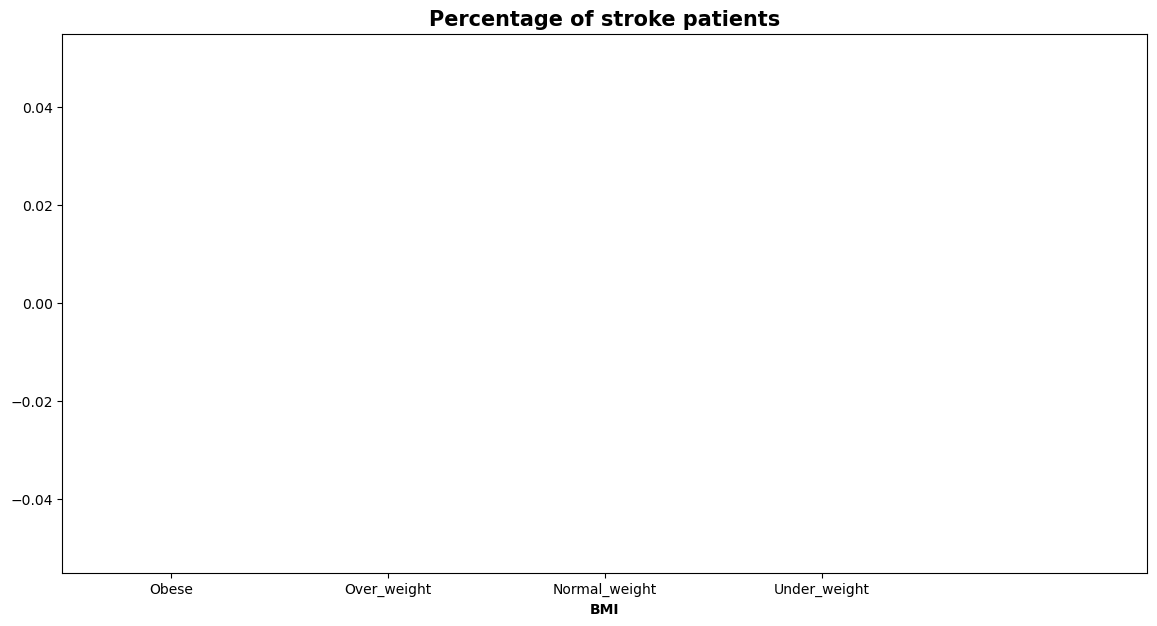

In [39]:
plt.subplots(figsize=(14,7))

(100*df2[df2["stroke"].isin([1])]['bmi_cat'].value_counts()/df2['bmi_cat'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['bmi_cat'].value_counts()/df2['bmi_cat'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')
    
plt.xlabel('BMI' , fontweight ='bold')
plt.xticks(ticks=[0,1,2,3], labels=['Under_weight','Normal_weight','Over_weight','Obese'][::-1] ,rotation=0)
plt.show()

<ul>
<li>Obese and overweight people  have more chance of heart stroke</li>
</ul>

#### 4.6 Heart disease vs Stroke

In [40]:
df2.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_cat'],
      dtype='object')

In [41]:
df['heart_disease'] = df['heart_disease'].astype(str)
df['stroke'] = df['stroke'].astype(str)

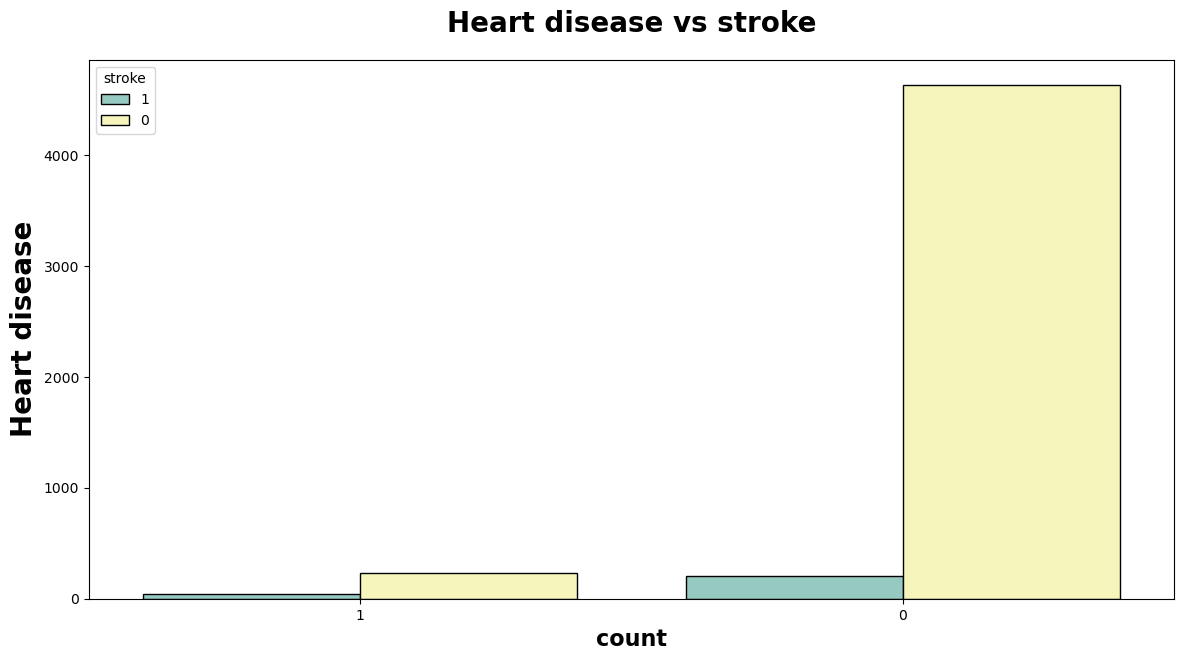

In [42]:
plt.subplots(figsize=(14,7))
sns.countplot(x="heart_disease",hue='stroke', data=df,ec = "black",palette="Set3")
plt.title("Heart disease vs stroke", weight="bold",fontsize=20, pad=20)
plt.ylabel("Heart disease", weight="bold", fontsize=20)
plt.xlabel("count", weight="bold", fontsize=16)
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


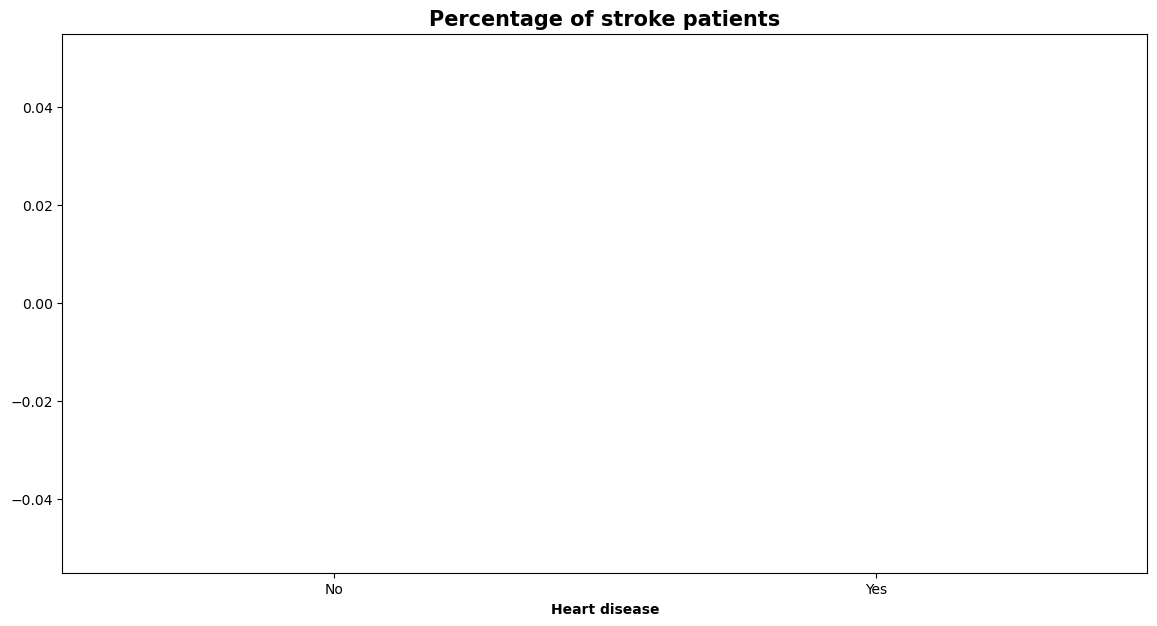

In [43]:
plt.subplots(figsize=(14,7))

(100*df2[df2["stroke"].isin([1])]['heart_disease'].value_counts()/df2['heart_disease'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of stroke patients" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["stroke"].isin([1])]['heart_disease'].value_counts()/df2['heart_disease'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')
    
plt.xlabel('Heart disease' , fontweight ='bold')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'] ,rotation=0)
plt.show()